# Data Visualization

## 1. Introduction

This section presents the basics of how to read in, examine, and make plots a dataset. Many of the subtleties of R will be covered later.

Focus on making sure everything works, and in typing in each of the commands. Try to see if you can understand how they work.

## 2. Reading in Data

We'll be using data on LEGO sets gathered by [Rebrickable](https://rebrickable.com/), heavily cleaned to make it easier to use during these exercises.

Create a new R notebook by clicking the R button on the Launcher (which should be the right half of the screen in JupyterLab) under "New Notebook." Notebooks are a way of organizing your R code, allowing you to go and change or delete commands that you've entered. Your new notebook will have a single code cell, where you can enter a command. Type the following into the notebook, and press Shift+Enter to run it.

In [91]:
lego <- read.csv("https://raw.githubusercontent.com/Greg-Hallenbeck/HARP-325-DataSociety/main/dataviz/lego-simplified.csv")

If you ran it, there's now a little number in brackets next to the line, probably `[1]`, saying it was the first piece of code you ran in the notebook. You may have gotten a bunch of red text. That's an error, probably stating that it cannot open the URL (i.e. you gave it the wrong web location of the file). You can copy-paste my code above instead if you got that error.

In [80]:
lego <- read.csv("https://raw.githubusercontent.com/Greg-Hallenbeck/HARP-325-DataSociety/main/dataviz/lego-simplified.cs")

Warning message in file(file, "rt"):
“cannot open URL 'https://raw.githubusercontent.com/Greg-Hallenbeck/HARP-325-DataSociety/main/dataviz/lego-simplified.cs': HTTP status was '404 Not Found'”


ERROR: Error in file(file, "rt"): cannot open the connection to 'https://raw.githubusercontent.com/Greg-Hallenbeck/HARP-325-DataSociety/main/dataviz/lego-simplified.cs'


This line of code runs a **function** called read.csv() and takes one **argument** (the input to the function), the name of the file. It then **returns** (outputs or gives you as a result) that file's contents for the user.

The `<-` is a picture of an arrow called the assignment operator. It takes the data from `read.csv()` and puts it into a **variable** called `lego`. A variable is a convenient name we give to pieces of our data so that we can refer to them later. If we want to work with this LEGO data, we can just type `lego`, instead of loading it again from scratch.

If you don't store data in a variable, it will be printed out to the display. If you do store data in a variable, it will not be printed out. This can be an important thing to keep in mind: if your notebook is full of lots of long print outs, the data probably isn't being stored for later use!

## 3. Examining Data

The `head()` function can be used to quickly examine the first 6 rows of a dataset. It takes in one argument (the dataset you want to examine) and returns the first six entries (or **rows**).

In a new cell, type and run the following command:

In [92]:
head(lego)

,set_num,name,year,num_parts,theme
,<chr>,<chr>,<int>,<int>,<chr>
1,0011-2,Town Mini-Figures,1978,12,Classic Town
2,0012-1,Space Mini-Figures,1979,12,Space
3,0013-1,Space Mini-Figures,1979,12,Space
4,0014-1,Space Mini-Figures,1979,12,Space
5,0015-1,Space Mini-Figures,1979,18,Space
6,005-1,Basic Building Set in Cardboard,1965,35,Classic


This output of `head()` lets us see what's in the dataset. It is *extremely useful*, especially when you're making modifications, to make sure you haven't corrupted or done something wrong with the data. We can see that there are 6 columns, telling us info LEGO sets. There is:
* Set number (a character key)
* Name of the set (characters)
* Year the set was released (numeric)
* The number of pieces in the set (numeric)
* The set's overarching theme (a category - but stored as characters)

## 4. Crash Course in ggplot

### 4.1. Installing and Loading Packages

Next, we're going to make some graphs to explore and visualize the data. Most of the things we will be doing in this course aren't built into R, but are in add-ons that other people have written called **packages**. By far the most popular package for data visualization in R is ggplot. So, let's load it in.

In [93]:
library(ggplot2)

If you get an error stating `there is no package called ‘ggplot2’`, then you'll have to install the package. Run the following line, and then delete it so that you never run it again. Re-installing packages should be avoided.

It may take some time! Be patient.

Once it is installed, run the `library(ggplot2)` function again.

In [5]:
install.packages("ggplot2")

also installing the dependencies ‘glue’, ‘colorspace’, ‘cli’, ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘rlang’, ‘viridisLite’, ‘lifecycle’, ‘magrittr’, ‘pillar’, ‘pkgconfig’, ‘vctrs’, ‘gtable’, ‘isoband’, ‘scales’, ‘tibble’, ‘withr’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



### 4.2. Your First Plot

#### A Scatterplot.

Run the following code to get a plot, then we'll talk about what is happening in R.

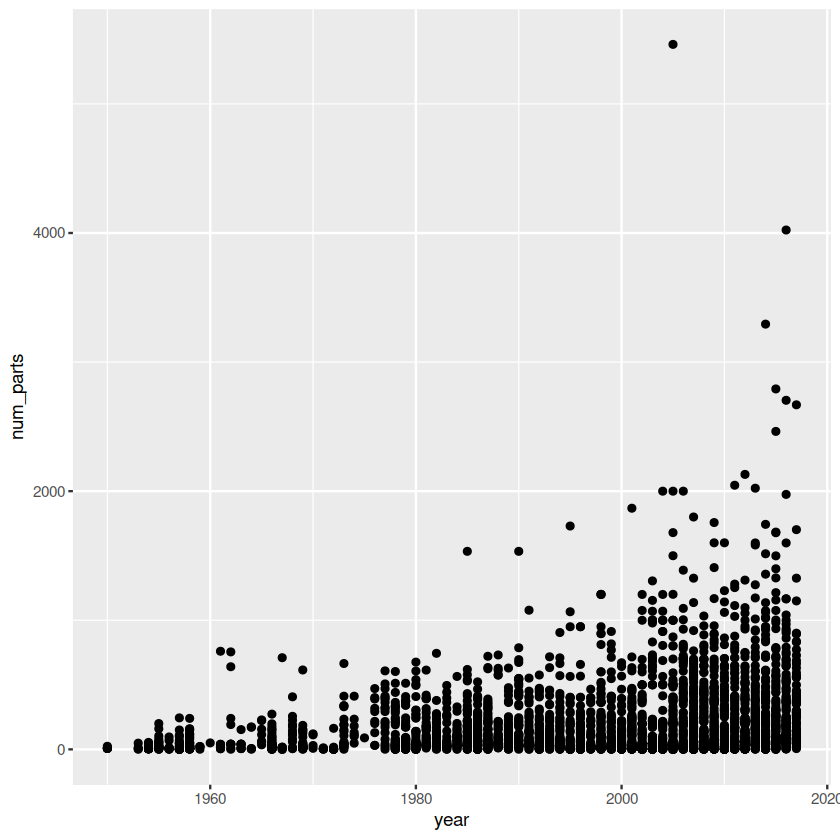

In [112]:
ggplot(data = lego) +
  geom_point(aes(x = year, y=num_parts))

The first line, `ggplot(data = lego)` creates a plot based on the data in the variable `college`. We then add to that plot a layer of points—often called a scatterplot—using the  `geom_points()` function. Every plot in ggplot requires these two pieces: `ggplot()` to create the plot, followed by some plot geometry, using a `geom_X()` function, added together.

The `geom_X()` functions require a an **aesthetic** and potentially some additional arguments as well. An aesthetic is created with the `aes()` function and tells ggplot how you want to visualize the data. In the case of a scatterplot, you need to know what is being plotted on the x and y axes. You can see this in the `x=year` and `y=num_parts` arguments to the `aes()` function above. Note that both `year` and `num_parts` are columns in the `lego` dataframe providing the data to ggplot.

In the next few examples, we'll go over each of the following:

1. Four standard `geom_X()` functions that cover a wide variety of visualization needs.
2. Aesthetic and other plot options beyond the minimum requirements.
3. A few other ggplot functions that can be added on top of a basic geom for customization.

This only scratches the surface of the ggplot library. I recommend checking out at least one of the references at the end of the notebook perusing for more ideas. The R Graph Gallery in particular has a few easy options to make your graphs interactive.

### 4.3. Plot Type Guide

Before making a graph, we need to decide what *kind* of graph we want.

##### 1. Is the data we're plotting numbers or categorical?

This distinction is important for making a plot because numeric variables have an inherent numbering and spacing to them: 5 is larger than 2, and the distance from 3 to 4 is the same as the distance from 100 to 101. Categorical data don't have this: is "romance" larger than "comedy"? How far should "horror" and "romance" be from each other?

##### 2. Are we examining the counts of a single variable, or comparing two variables?

Are you looking at the counts of how many movies are rated "R" (just examining one variable)? Or are you looking at the typical IMDB rating for each rating (looking at two variables)?

Here's a handy summary of the basic graph types based on these questions:

| Data Type        | One Variable | Two Variables|
| ---------------- | ------------------- | ----------------------- |
| **Numeric**     | Histogram           | Scatterplot             |
| **Categorical** | Bar Plot            | Boxplot |

#### Histograms.

We've already seen the `geom_point()` geometry, which is used to produce scatterplots. `geom_histogram()` is used to make histograms. Below is a histogram of the year sets came out. It looks like over time, there are more an more sets being released, with a peak around 2019. It may be that fewer sets have been released in the past few years or that not all of the most recent sets are represented.

We're introducing an additional argument to `geom_histogram()`, a bin width of 2 unit (in this case, years). Any arguments provided to the aesthetic must vary based on some column in your dataset, whereas arguments provided to the geometry are globally true. The width of the histogram's bins is constant. Alternatively, you can specify `bins=` some number to select the number of bins, rather than their size.

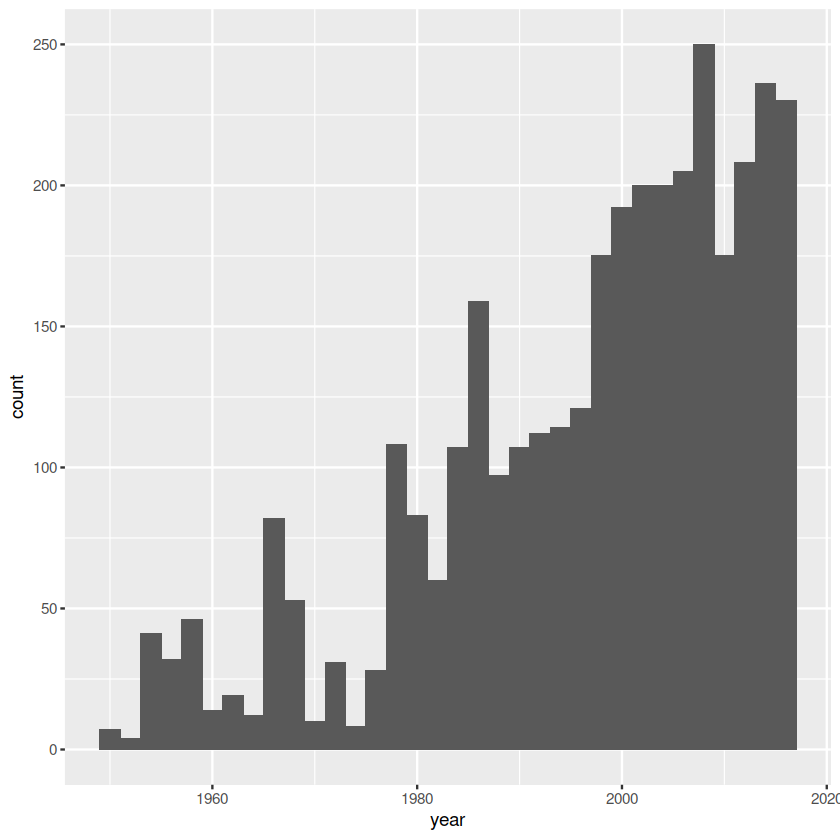

In [95]:
ggplot(data = lego) +
  geom_histogram(aes(x = year), binwidth=2)

#### Bar Plots.

The `geom_bar()` is used to produce bar plots, which are counts of categorical data. Below is a plot showing how many sets have been released for each of the major themes. It looks like *Star Wars* is the largest, but there are a lot of Bionicle, Classic Town, and "Universal Building Set".

The labels on this plot have been rotated by 90$^\circ$ for readability using the `theme()` function (I found out how to do that on [this blog](https://datavizpyr.com/rotate-x-axis-text-labels-in-ggplot2/) by doing a quick Google search). See what happens if you remove that last line from the plot.

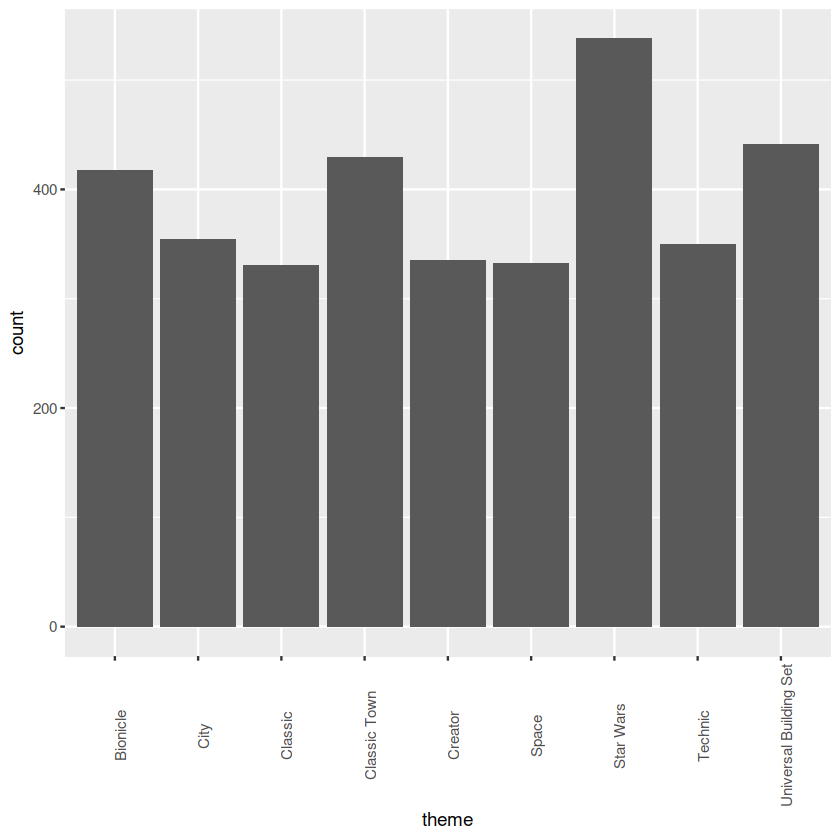

In [97]:
ggplot(data = lego) +
  geom_bar(aes(x = theme)) +
  theme(axis.text.x = element_text(angle = 90))

#### Boxplots.

You may be less familiar with boxplots, but I assure you they are great. A boxplot is a quick way of visualizing the spread of a numeric variable, organized by category (you can think of it as a bunch of histograms split by category, laid out vertically). What you need to know is:
* The central dark band of each box represents the *median*: half of the data are below and the other half above the median.
* The central "box" contains half of the data, spread around the median.
* The lines or "whiskers" represent the range of the data (without "outliers")
* The individual points are "outliers", that is data which are quite far from the main body near the median.

From the plot below, you can quickly see that the Creator and Star Wars sets tend to have the most pieces (with some of the Star Wars sets quite gigantic at 3000+ pieces!), while the individual minifigures, "service packs" and advent calendars have the fewest.

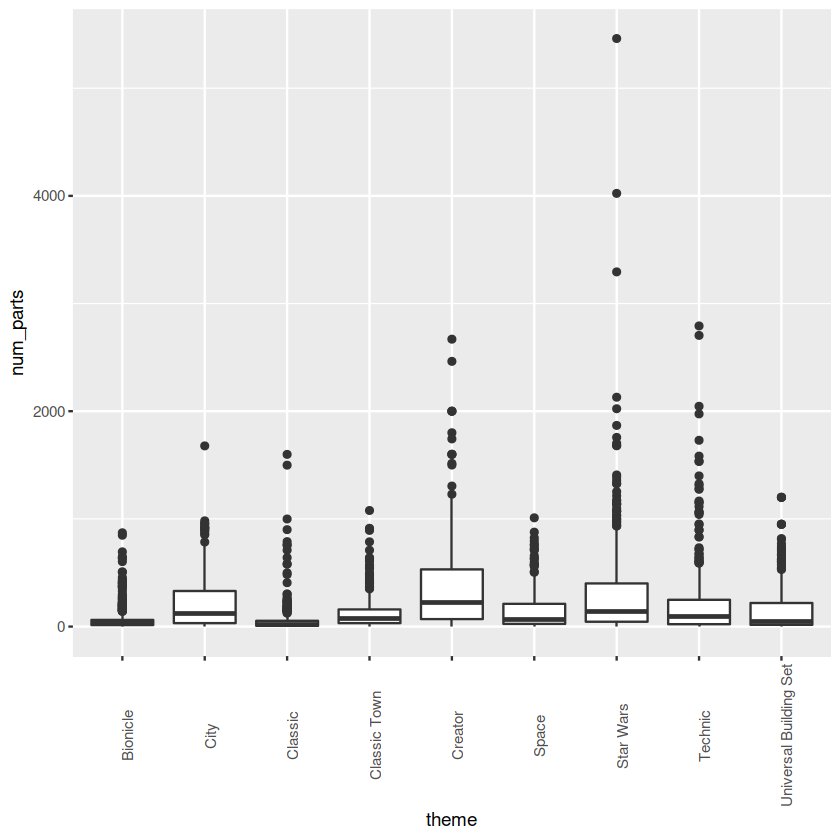

In [99]:
ggplot(data = lego) +
  geom_boxplot(aes(x = theme, y=num_parts)) +
  theme(axis.text.x = element_text(angle = 90))

### 4.4. Additional Functions

The ggplot package produces plots *additively*, that is, you add additional functions on top of the basic ones to make changes to the plot. Some commonly-used functions:

* `xlim()` and `ylim()` adjust the limits of the plots.
* `xlab()` and `ylab()` change the label on the axes.
* `facet_wrap()` is used to split one plot into many, based on a categorical variable.
* `coord_flip()` is used to switch the x and y axes. This is a way to avoid having to rotate labels.
* `theme()` is used to tweak [many little things](https://ggplot2.tidyverse.org/reference/theme.html).

Here are the plots you previously saw, with many of these applied.

Warning message:
“Removed 11 rows containing missing values (geom_point).”


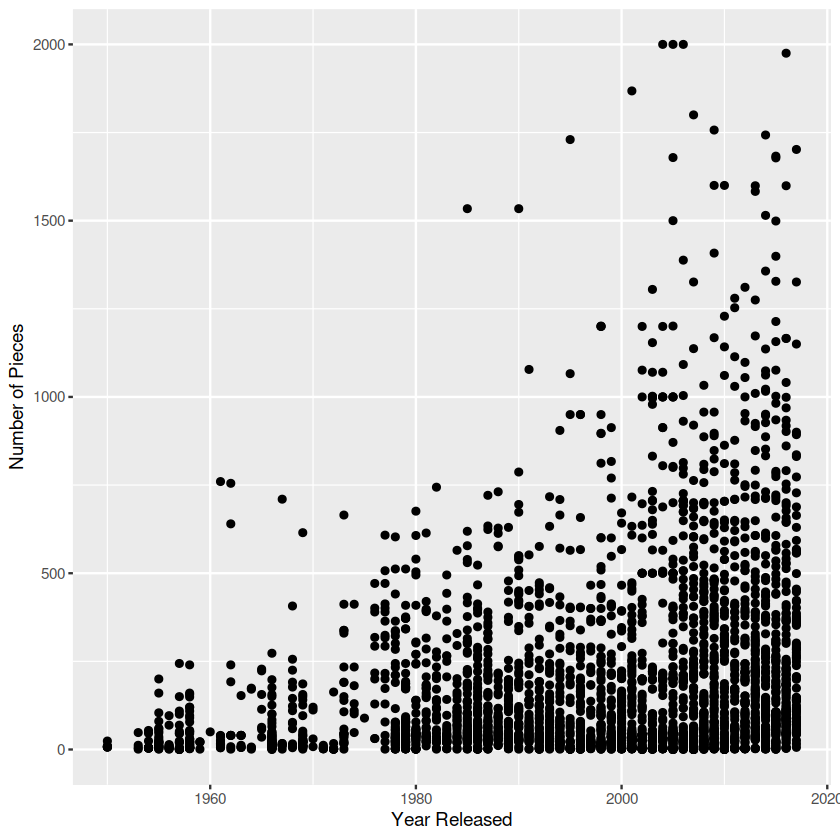

In [100]:
ggplot(data = lego) +
  geom_point(aes(x = year, y=num_parts)) +
  xlab("Year Released") +
  ylab("Number of Pieces") +
  ylim(0,2000)

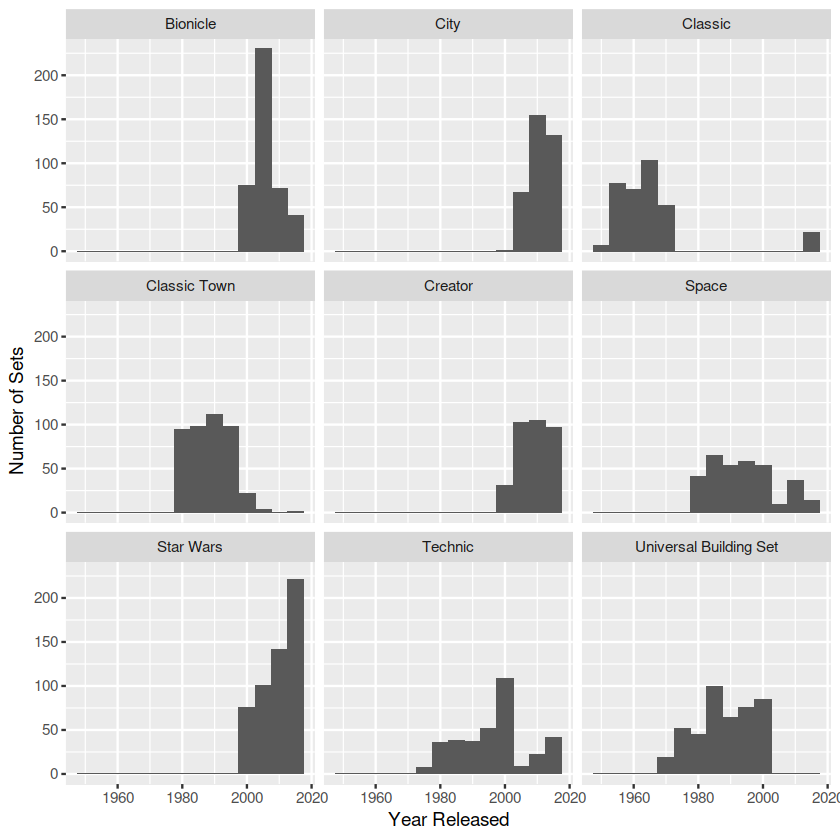

In [110]:
ggplot(data = lego) +
  geom_histogram(aes(x = year), binwidth=5) +
  xlab("Year Released") +
  ylab("Number of Sets") +
  facet_wrap(~theme)

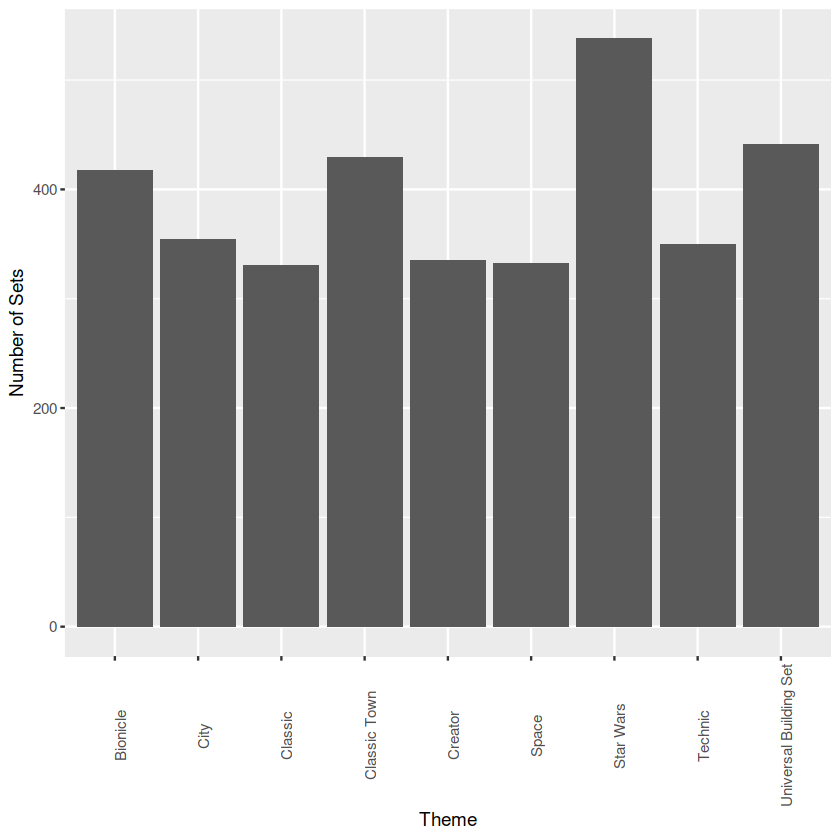

In [139]:
ggplot(data = lego) +
  geom_bar(aes(x = theme)) +
  theme(axis.text.x = element_text(angle = 90)) +
  xlab("Theme") + ylab("Number of Sets")

Warning message:
“Removed 86 rows containing non-finite values (stat_boxplot).”


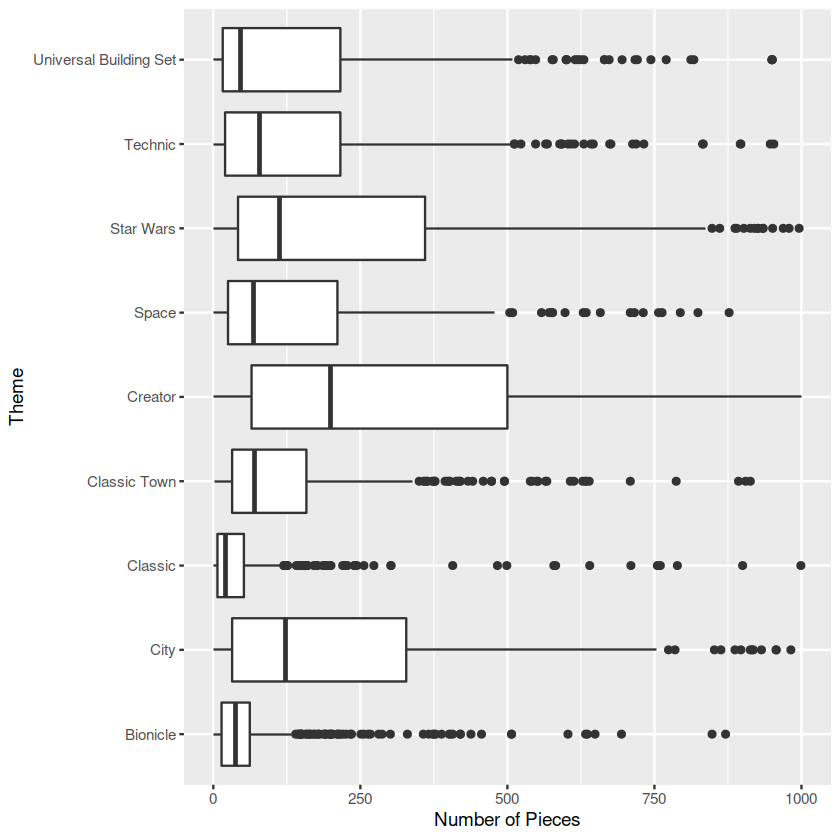

In [122]:
ggplot(data = lego) +
  geom_boxplot(aes(x = theme, y=num_parts)) +
  xlab("Theme") +
  ylab("Number of Pieces") + 
  coord_flip() +
  ylim(0,1000)

### 4.5. Tweaking with Geometry and Aesthetic.

Anything included in the aesthetic must relate to a column of your dataframe, and will vary based on that column. Each geometry has a number of options which can be tweaked, as well; we've already seen `binwidth`. Find reference guides, look things up, and so on.

* `x`, `y` These are used for the x and y
* `size` sets the size points or brush strokes. Should be set to a numeric variable (or just a number, if part of the geometry).
* `fill`, `color` are used to fill in or set the outline color of, respectively. Should be set to a numeric variable if in an aesthetic. Otherwise, choose a single character value from the [standard HTML list of colors](https://www.w3schools.com/colors/colors_names.asp) or a custom hex color, e.g. "#CC44FF".
* `shape` used to set the shape of points in a scatterplot or boxplot. Can be set to a categorical variable, or a single number.
* `alpha` sets the transparency, from 0.0 (transparent) to 1.0 (completely opaque). Can be useful when you have waaaay too many

In addition, you can set the `position`, which is used only for the histogram and bar graph geometries, and not in an aesthetic. It tells ggplot how you want multiple categories to be displayed, including "dodge" (slightly offset from each other), "stack" (on top of each other), or "fill" (make each bar the same height, which is good for looking at percentages).

##### Changing Palette.

The default palette is quite nice, but there are a lot more pre-defined ones. 

* `scale_fill_brewer(palette="palette name")` produces a new palette of discrete values (for categorical data) from the list of [RColorBrewer](https://r-graph-gallery.com/38-rcolorbrewers-palettes.html) palettes.
* `scale_fill_distiller(pallete="palette name")` is the equivaent for continuous data.
* `scale_fill_gradient(low="color name", high="color name")` produces a custom continuous palette that smoothly transitions from one color to another.

##### Additional Geometries.

You can layer multiple geometries on a single plot. One I frequently combine with `geom_point()` is `geom_smooth()`, which adds a smoothed curve to your plot.

##### *Ite, missa est.*

There is only so much time we can dedicate to ggplot in this class. We could easily fill an entire course with it. You can—and should—spend time on your own investigating whenever you have a new idea of how to visualize the data or have time to really fancy up a plot. Even the examples below will use code I have stumbled upon but have not fully explained. Good luck!

___
Below are the same graphs you saw above, but with additional tweaks. Play around with what you see and find your own favorite options for ggplot.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 86 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 86 rows containing missing values (geom_point).”


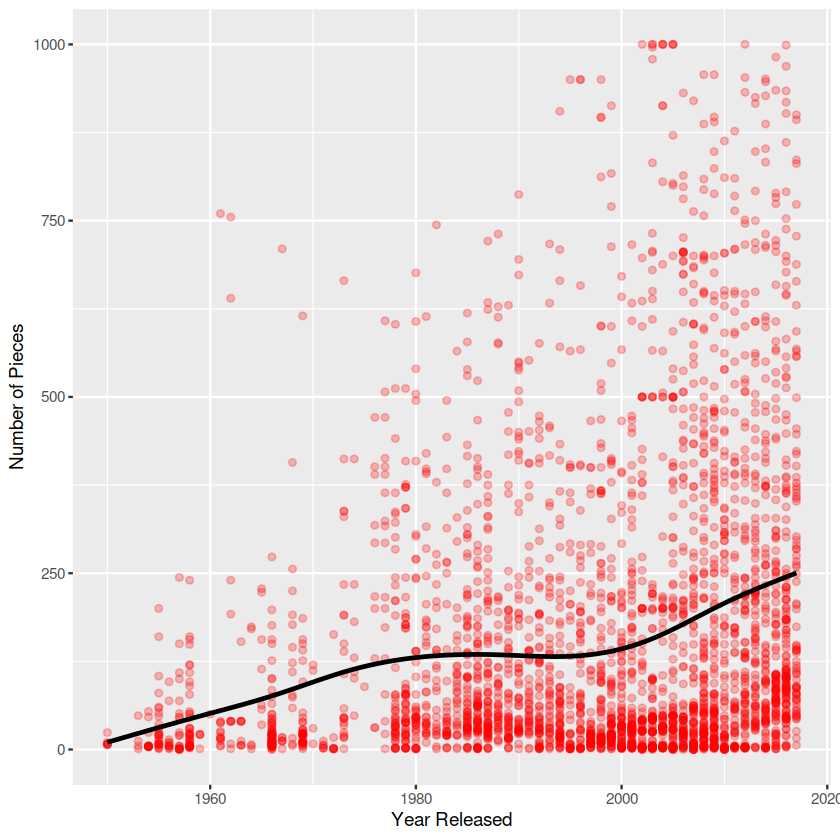

In [152]:
ggplot(data = lego) +
  geom_point(aes(x = year, y=num_parts), alpha=0.25, color="red") +
  xlab("Year Released") +
  ylab("Number of Pieces") +
  geom_smooth(aes(x=year, y=num_parts), color="black", se=FALSE) +
  ylim(0,1000)

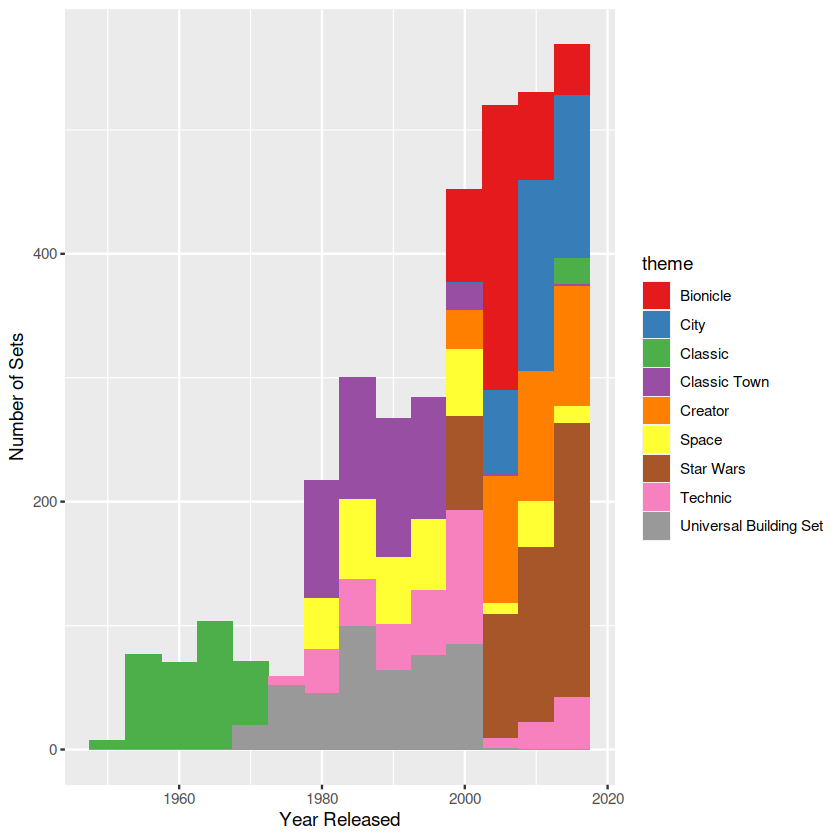

In [137]:
ggplot(data = lego) +
  geom_histogram(aes(x = year, fill=theme), binwidth=5, position="stack") +
  xlab("Year Released") + ylab("Number of Sets") +
  scale_fill_brewer(palette="Set1")

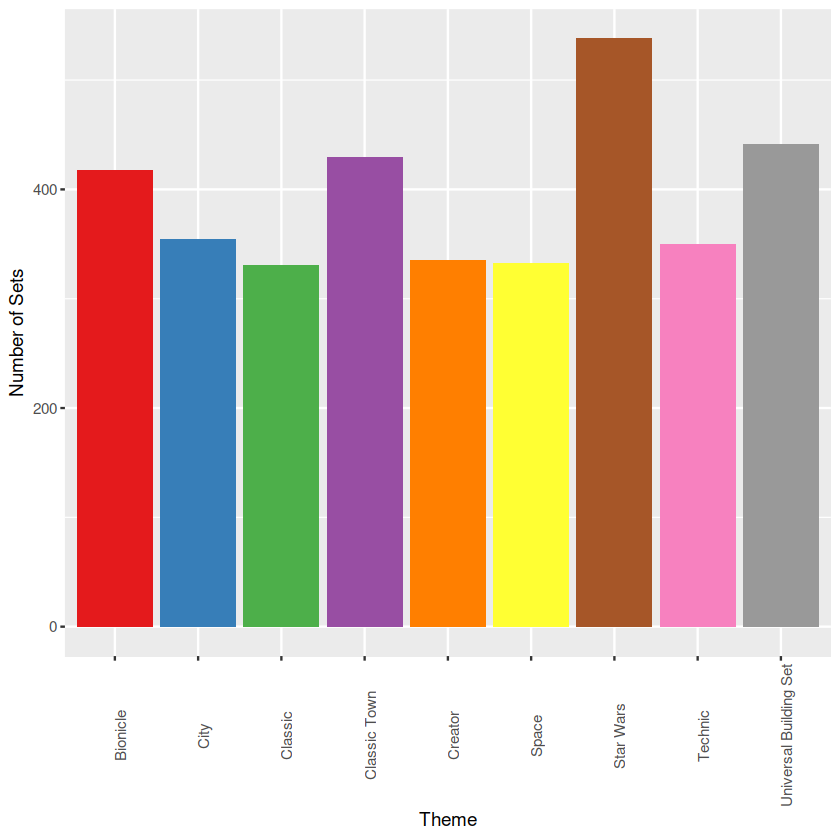

In [149]:
ggplot(data = lego) +
  geom_bar(aes(x = theme, fill=theme)) +
  theme(axis.text.x = element_text(angle = 90)) +
  xlab("Theme") + ylab("Number of Sets") +
  scale_fill_brewer(palette="Set1") +
  theme(legend.position="none")

Warning message:
“Removed 86 rows containing non-finite values (stat_boxplot).”


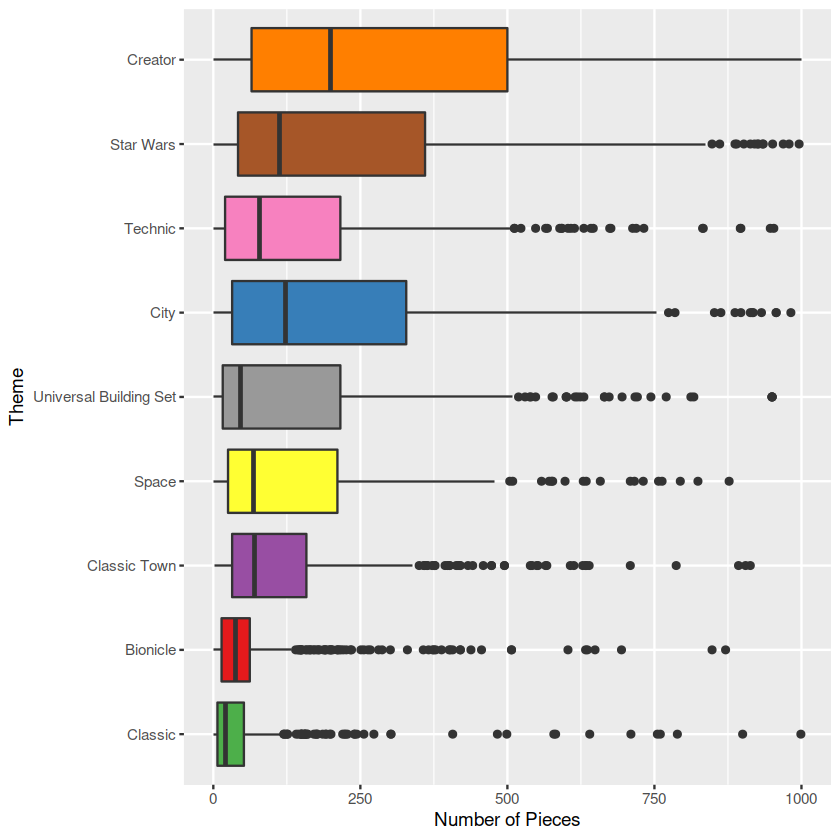

In [124]:
ggplot(data = lego) +
  geom_boxplot(aes(x = reorder(theme,num_parts), fill=theme, y=num_parts)) +
  xlab("Theme") + ylab("Number of Pieces") + 
  coord_flip() + ylim(0,1000) +
  theme(legend.position="none") +
  scale_fill_brewer(palette="Set1")

Warning message:
“Removed 32 rows containing non-finite values (stat_boxplot).”


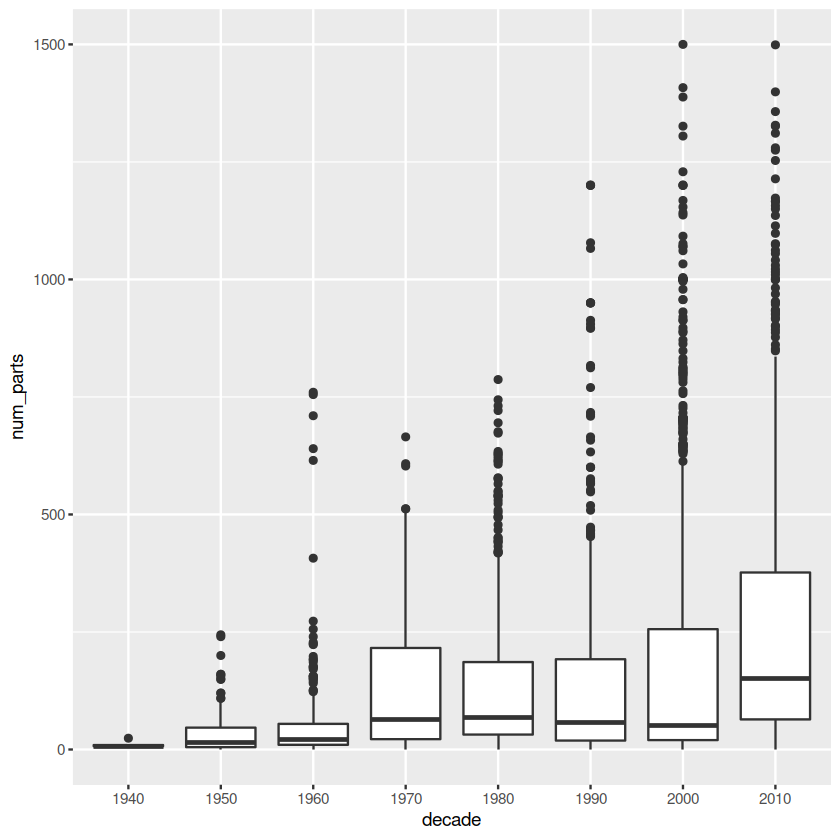

In [173]:
ggplot(data = lego %>% mutate(decade = factor(round(year-5,-1)))) +
  geom_boxplot(aes(x = decade, y=num_parts)) +
  ylim(0,1500)

___
##### References

* [ggplot2 cheat sheet](https://github.com/rstudio/cheatsheets/raw/main/data-visualization-2.1.pdf)
* [The R Graph Gallery](https://r-graph-gallery.com/), a collection of different R visualizations, organized by visualization type.
* ["Data Visualization"](https://r4ds.had.co.nz/data-visualisation.html) by Hadley Wickham
* ["ggplot2: Elegant Graphics for Visualization"](https://ggplot2-book.org/index.html) by Hadley Wickham
* [BBC Visual and Data Journalism Handbook](https://bbc.github.io/rcookbook/) by the BBC